# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | inyati
Processing Record 6 of Set 1 | kolonia
Processing Record 7 of Set 1 | nacala
Processing Record 8 of Set 1 | la passe
Processing Record 9 of Set 1 | fada
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | kirensk
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | tomatlan
Processing Record 21 of Set 1 | lensk
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,6.94,65,20,5.14,US,1712871286
1,waitangi,-43.9535,-176.5597,17.12,94,100,5.81,NZ,1712871229
2,qaqortoq,60.7167,-46.0333,-6.33,87,63,1.01,GL,1712871286
3,inyati,-19.6756,28.8469,14.82,83,85,6.35,ZW,1712871286
4,kolonia,50.9333,6.9500,15.46,80,100,0.51,DE,1712871163


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,6.94,65,20,5.14,US,1712871286
1,waitangi,-43.9535,-176.5597,17.12,94,100,5.81,NZ,1712871229
2,qaqortoq,60.7167,-46.0333,-6.33,87,63,1.01,GL,1712871286
3,inyati,-19.6756,28.8469,14.82,83,85,6.35,ZW,1712871286
4,kolonia,50.9333,6.9500,15.46,80,100,0.51,DE,1712871163


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

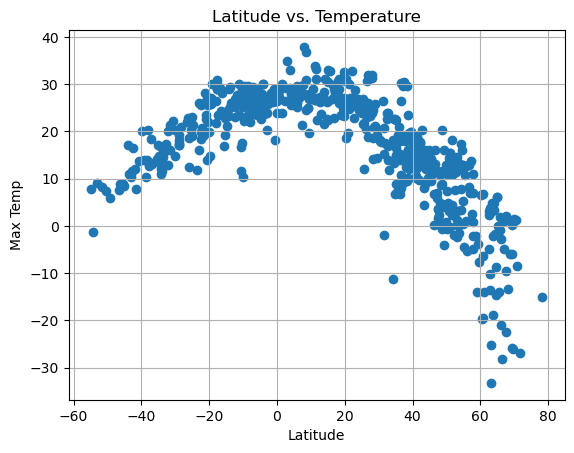

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

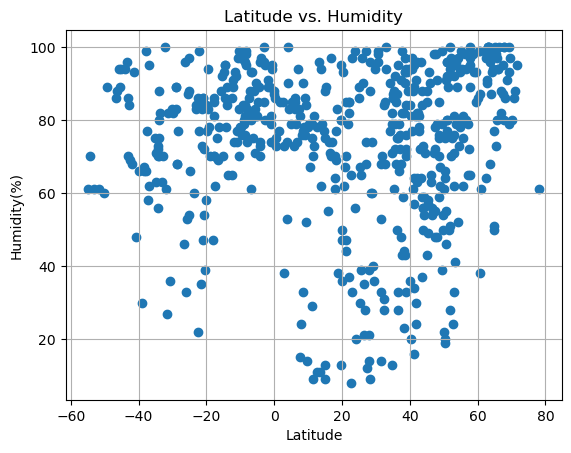

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

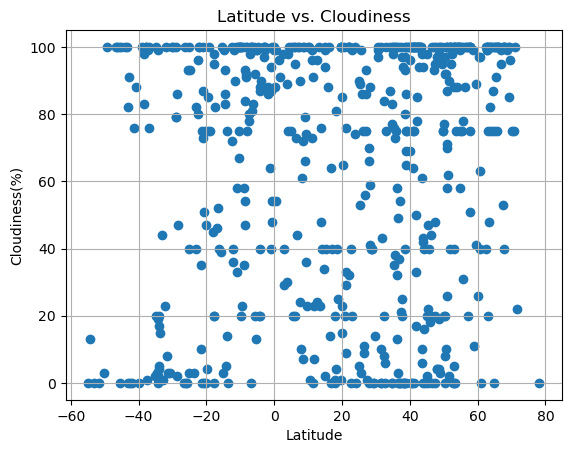

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

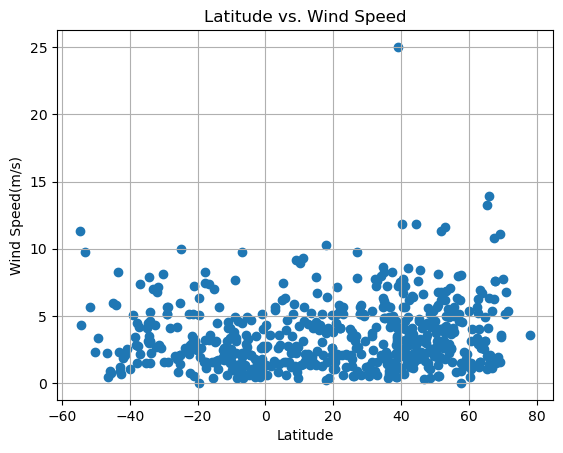

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,6.94,65,20,5.14,US,1712871286
2,qaqortoq,60.7167,-46.0333,-6.33,87,63,1.01,GL,1712871286
4,kolonia,50.9333,6.9500,15.46,80,100,0.51,DE,1712871163
6,la passe,45.5549,-0.8967,14.13,93,40,3.26,FR,1712871286
7,fada,9.5667,8.3000,26.92,14,23,0.36,NG,1712871286


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,17.12,94,100,5.81,NZ,1712871229
3,inyati,-19.6756,28.8469,14.82,83,85,6.35,ZW,1712871286
5,nacala,-14.5428,40.6728,24.53,95,86,3.11,MZ,1712871286
8,hithadhoo,-0.6000,73.0833,28.55,74,100,2.76,MV,1712871286
10,papatowai,-46.5619,169.4708,7.65,86,100,2.20,NZ,1712871287


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8389274438427995


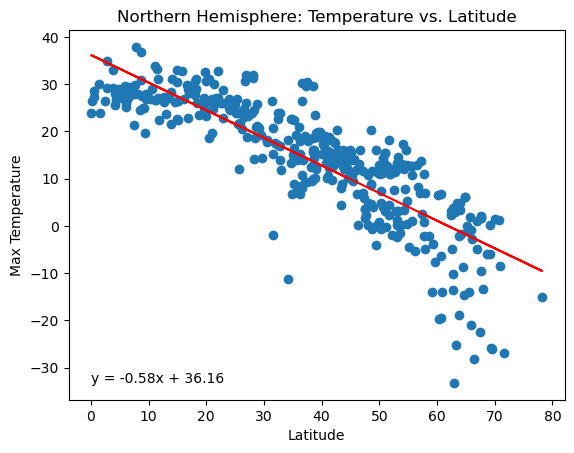

In [15]:
# Linear regression on Northern Hemisphere Temp Vs Lat
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere: Temperature vs. Latitude")

plt.show()

The r-value is: 0.8147293593382654


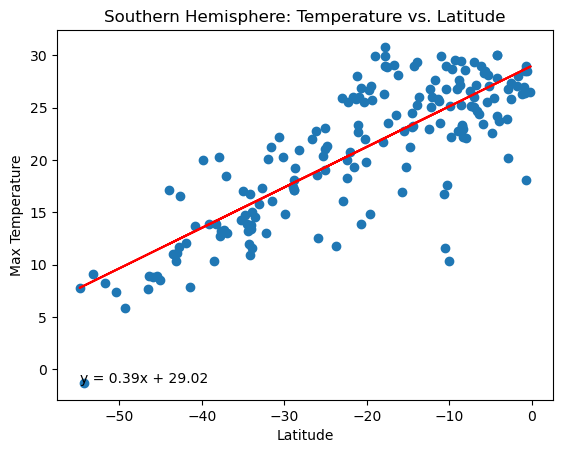

In [16]:
# Linear regression on Southern Hemisphere Temp Vs Lat
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere: Temperature vs. Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23429010370173975


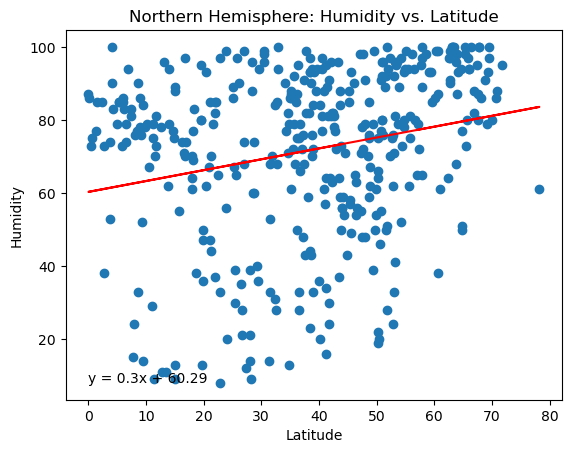

In [17]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude")

plt.show()

The r-value is: 0.29157991645505604


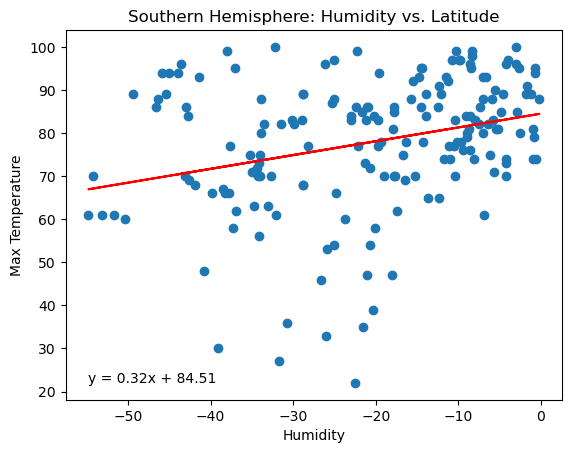

In [18]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Humidity")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere: Humidity vs. Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14349864916350705


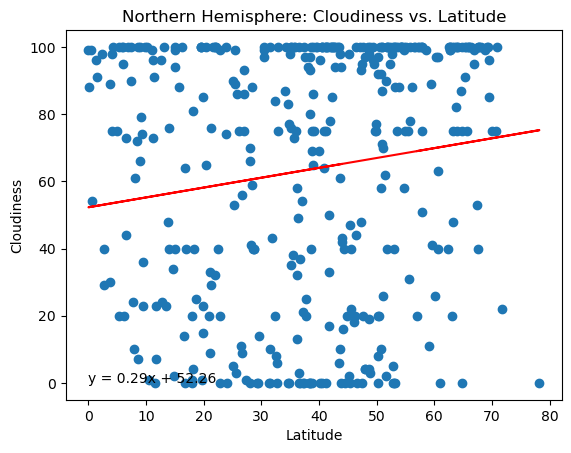

In [19]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")

plt.show()

The r-value is: 0.27088647992199627


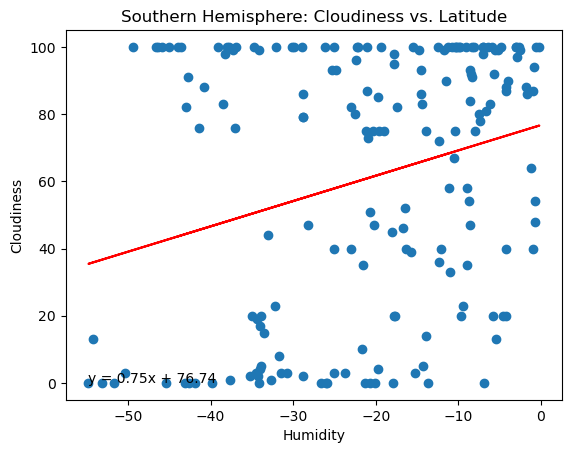

In [20]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Humidity")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11799725921893386


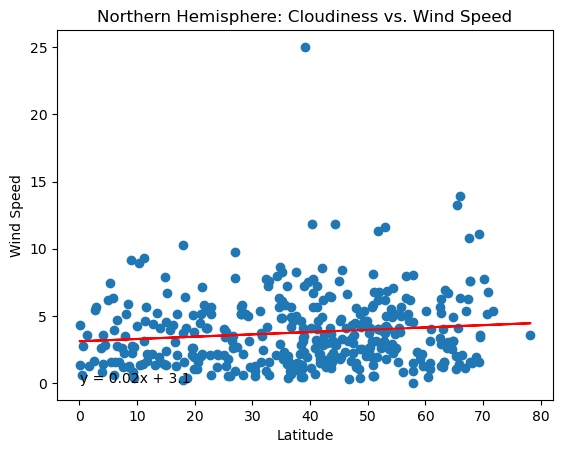

In [21]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Cloudiness vs. Wind Speed")

plt.show()

The r-value is: -0.2625824445894541


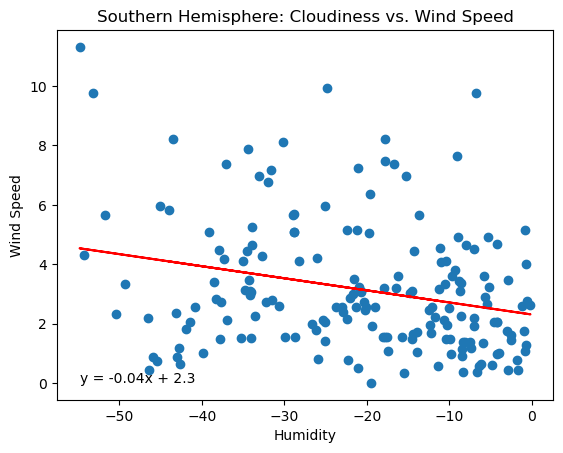

In [22]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Humidity")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Cloudiness vs. Wind Speed")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE